/tmp/ipykernel_81383/176259074.py:37: MatplotlibDeprecationWarning:

The 'drawtype' parameter of __init__() was deprecated in Matplotlib 3.5 and will be removed two minor releases later. If any parameter follows 'drawtype', they should be passed as keyword, not positionally.



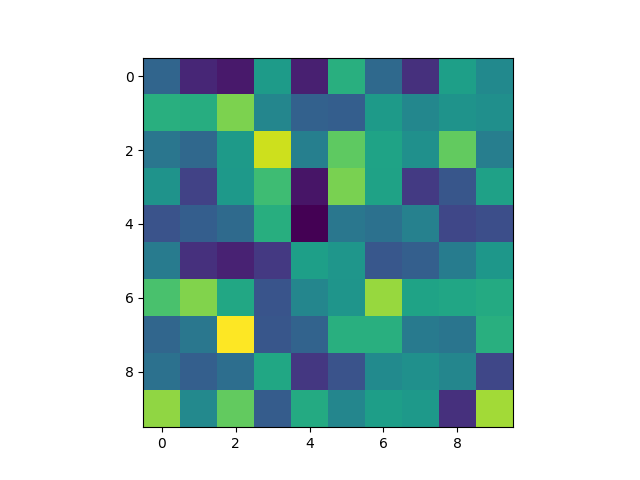

Button(description='Calculate averages', style=ButtonStyle())

In [8]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from ipywidgets import widgets

# Let's consider a 3D numpy array for demonstration
# For each (x, y), we have a 1D array of length 5
data = np.random.rand(10, 10, 5)

# Create a 2D projection by summing along the third dimension
data_2d = data.sum(axis=2)

fig, ax = plt.subplots()
heatmap = ax.imshow(data_2d, cmap='viridis')

coords = []

def line_select_callback(eclick, erelease):
    'eclick and erelease are matplotlib events at press and release.'
    x1, y1 = int(round(eclick.xdata)), int(round(eclick.ydata))
    x2, y2 = int(round(erelease.xdata)), int(round(erelease.ydata))
    coords.append((x1, y1, x2, y2))
    print(f'Selected points: {x1, y1, x2, y2}')

def on_button_clicked(b):
    global vector_
    vector_ = []
    for coord in coords:
        x1, y1, x2, y2 = coord
        selected_data = data[y1:y2, x1:x2].mean(axis=(0, 1))
        vector_.append(selected_data)
        print(f'Average for region ({x1}, {y1}, {x2}, {y2}): {selected_data}')

# Draw rectangle regions
rs = RectangleSelector(ax, line_select_callback,
                       drawtype='box', useblit=True,
                       button=[1, 3],  # don't use middle button
                       minspanx=5, minspany=5,
                       spancoords='pixels',
                       interactive=True)
plt.show()

# Add a button that when clicked, will trigger the calculation of the averages
button = widgets.Button(description="Calculate averages")
display(button)
button.on_click(on_button_clicked)


In [6]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 10.7 MB/s eta 0:00:000:00:01
